In [1]:
from utils import set_plot_params

import matplotlib.pyplot as plt
import pyarrow.parquet   as pq

################

set_plot_params() # Enables dark mode, larger canvas sizes, a pastel palette, and font sizing considerations

df = pq.read_table('../data/cmp/curated/meter-usage') \
       .to_pandas()
df

,service_point_id,meter_id,interval_end_datetime,meter_channel,kwh,account_number
0,2300822246,L108605388,10/1/2022 12:00:00 AM,10,0.594,30010320353
1,2300822246,L108605388,10/1/2022 12:15:00 AM,10,0.101,30010320353
2,2300822246,L108605388,10/1/2022 12:30:00 AM,10,0.104,30010320353
3,2300822246,L108605388,10/1/2022 12:45:00 AM,10,0.106,30010320353
4,2300822246,L108605388,10/1/2022 1:00:00 AM,10,0.099,30010320353
...,...,...,...,...,...,...
500275,2300588897,L108607371,9/30/2021 7:00:00 PM,10,1.242,35012790198
500276,2300588897,L108607371,9/30/2021 8:00:00 PM,10,1.202,35012790198
500277,2300588897,L108607371,9/30/2021 9:00:00 PM,10,1.186,35012790198
500278,2300588897,L108607371,9/30/2021 10:00:00 PM,10,1.150,35012790198


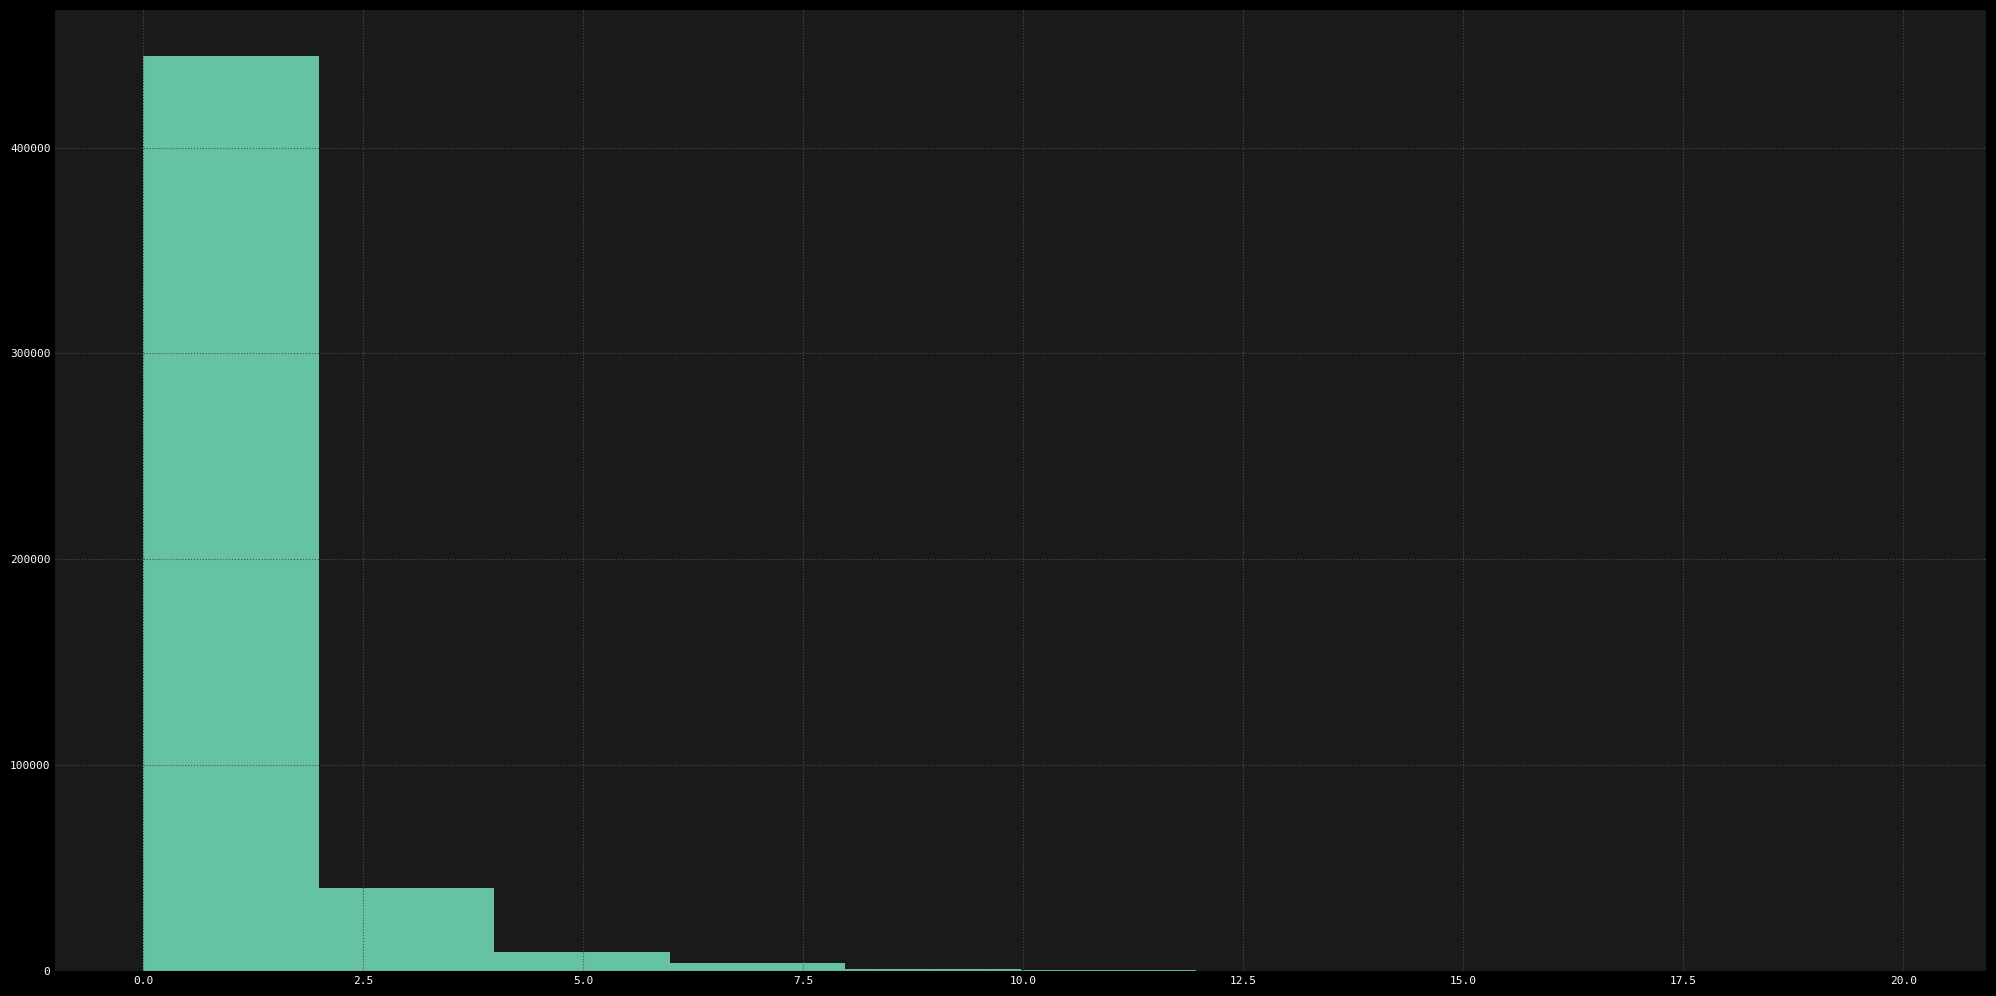

In [10]:
# Example
plt.hist(df['kwh'])
plt.show()

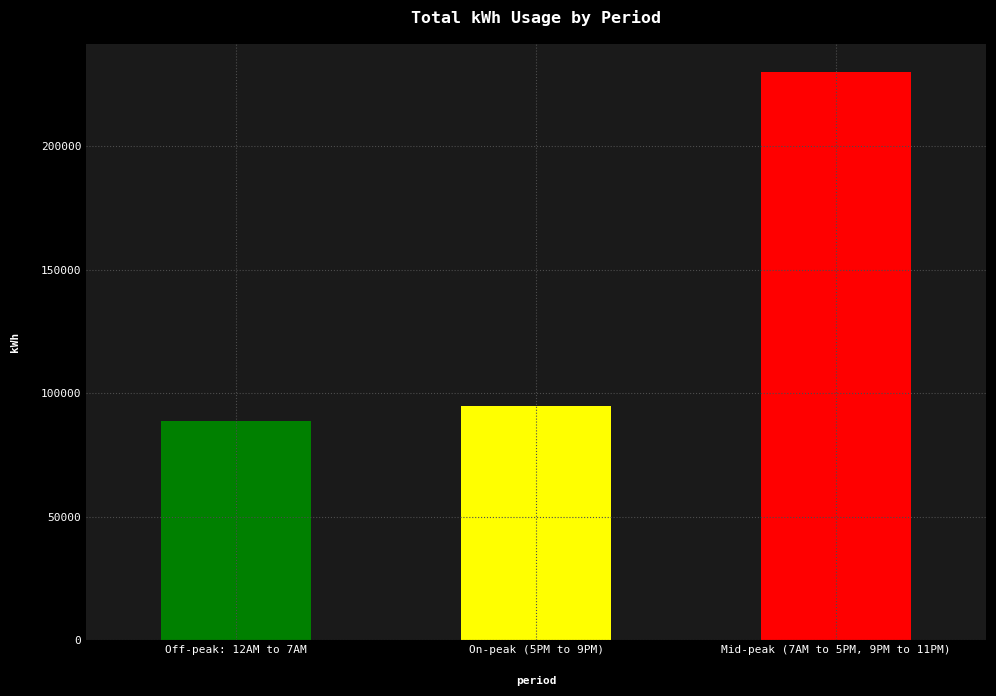

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Showing usage by On/Off/Mid-peak

# 1. Convert interval_end_datetime to datetime with specified format
df['interval_end_datetime'] = pd.to_datetime(df['interval_end_datetime'], format='%m/%d/%Y %I:%M:%S %p')

# 2. Extract hour
df['hour'] = df['interval_end_datetime'].dt.hour

# 3. Classify each row into one of the three periods
def classify_hour(hour):
    if 0 <= hour < 7:  # 12AM to 7AM is off-peak
        return 'Off-peak: 12AM to 7AM'
    elif (7 <= hour < 17) or (21 <= hour < 23):
        return 'Mid-peak (7AM to 5PM, 9PM to 11PM)'
    else:
        return 'On-peak (5PM to 9PM)'

df['period'] = df['hour'].apply(classify_hour)

# 4. Group by period and sum kWh
period_kwh = df.groupby('period')['kwh'].sum()

# 5. Plot
period_kwh.sort_values().plot(kind='bar', color=['green', 'yellow', 'red'], rot=0)
plt.title('Total kWh Usage by Period')
plt.ylabel('kWh')
plt.show()



Unique periods: ['Off-peak: 12AM to 7AM' 'Mid-peak (7AM to 5PM, 9PM to 11PM)'
 'On-peak (5PM to 9PM)']

Non-zero counts in period_kwh:
period
Mid-peak (7AM to 5PM, 9PM to 11PM)    230073.873
Off-peak: 12AM to 7AM                  88837.882
On-peak (5PM to 9PM)                   94895.389
Name: kwh, dtype: float64

NaN values in average_hourly_usage: 0
Infinite values in average_hourly_usage: 0


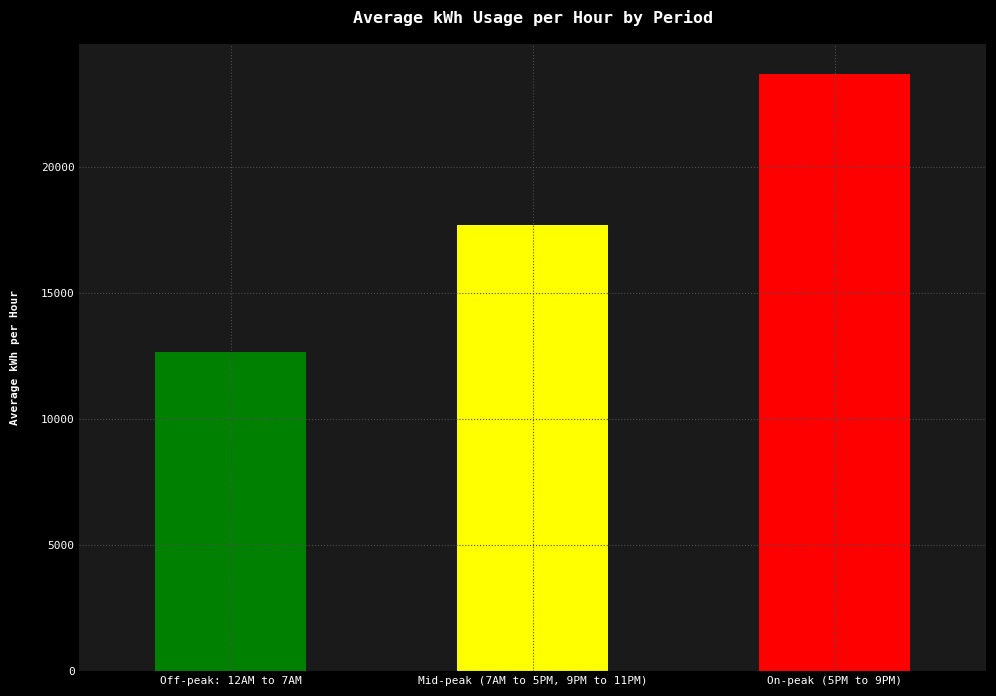

In [7]:
# Showing average usage per hour within each On/Off/Mid-peak period

# 1. Calculate total kWh usage for each period
period_kwh = df.groupby('period')['kwh'].sum()

# 2. Divide by the number of hours in each period to get average hourly usage
hours_in_period = {
    'Off-peak: 12AM to 7AM': 7,
    'Mid-peak (7AM to 5PM, 9PM to 11PM)': 13,  
    'On-peak (5PM to 9PM)': 4
}


average_hourly_usage = period_kwh / pd.Series(hours_in_period)

# After classifying the hours
print("Unique periods:", df['period'].unique())

# After aggregating kWh by period
print("\nNon-zero counts in period_kwh:")
print(period_kwh[period_kwh != 0])

# After calculating average_hourly_usage
print("\nNaN values in average_hourly_usage:", average_hourly_usage.isna().sum())
print("Infinite values in average_hourly_usage:", (average_hourly_usage == float('inf')).sum())


# 3. Plot
average_hourly_usage.sort_values().plot(kind='bar', color=['green', 'yellow', 'red'], rot=0)
plt.title('Average kWh Usage per Hour by Period')
plt.ylabel('Average kWh per Hour')
plt.show()


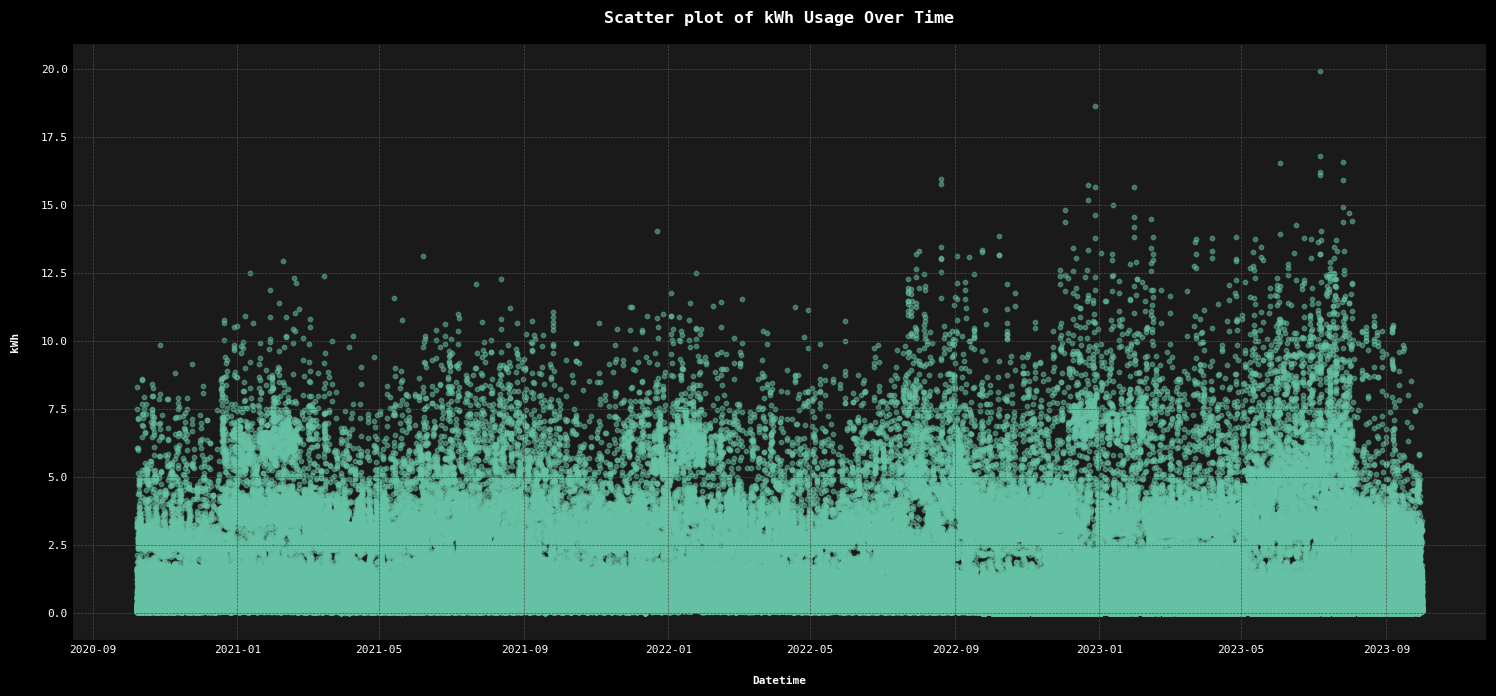

In [11]:
import matplotlib.pyplot as plt

# Ensure that interval_end_datetime is still the index
if 'interval_end_datetime' not in df.columns:
    df.reset_index(inplace=True)

# Scatter plot
plt.figure(figsize=(15,7))
plt.scatter(df['interval_end_datetime'], df['kwh'], alpha=0.5, s=10)
plt.title('Scatter plot of kWh Usage Over Time')
plt.ylabel('kWh')
plt.xlabel('Datetime')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()
